derivative of sin: 1. via symbolic derivative 2. via Taylor series

In [7]:
# 1. derivative of sin is cos

import sys
import os

cwd = os.getcwd()
parent_dir = os.path.abspath(os.path.join(cwd, os.pardir))
sys.path.append(parent_dir)

import numpy as np
from dezero import Function

class Sin(Function):
    def forward(self, x):
        y = np.sin(x)
        return y

    def backward(self, gy):
        x = self.inputs[0].data
        gx = gy * np.cos(x)
        return gx

def sin(x):
    return Sin()(x)



In [9]:
from dezero import Variable

x = Variable(np.array(np.pi/4))
y = sin(x)
y.backward()

print(y.data)
print(x.grad)

0.7071067811865475
variable(0.7071067811865476)


In [19]:
# 2. Taylor series

import sys
import os

cwd = os.getcwd()
parent_dir = os.path.abspath(os.path.join(cwd, os.pardir))
sys.path.append(parent_dir)

import math

def my_sin(x, threshold=0.0001):
    y = 0
    for i in range(100000):
        c = (-1)**i / math.factorial(2*i+1)
        t = c * x ** (2*i + 1)
        y = y + t
        if abs(t.data) < threshold:
            break
    return y
    

In [21]:
x = Variable(np.array(np.pi/4))
y = my_sin(x)
y.backward()

print(y.data)
print(x.grad)

0.7071064695751781
variable(0.7071032148228457)


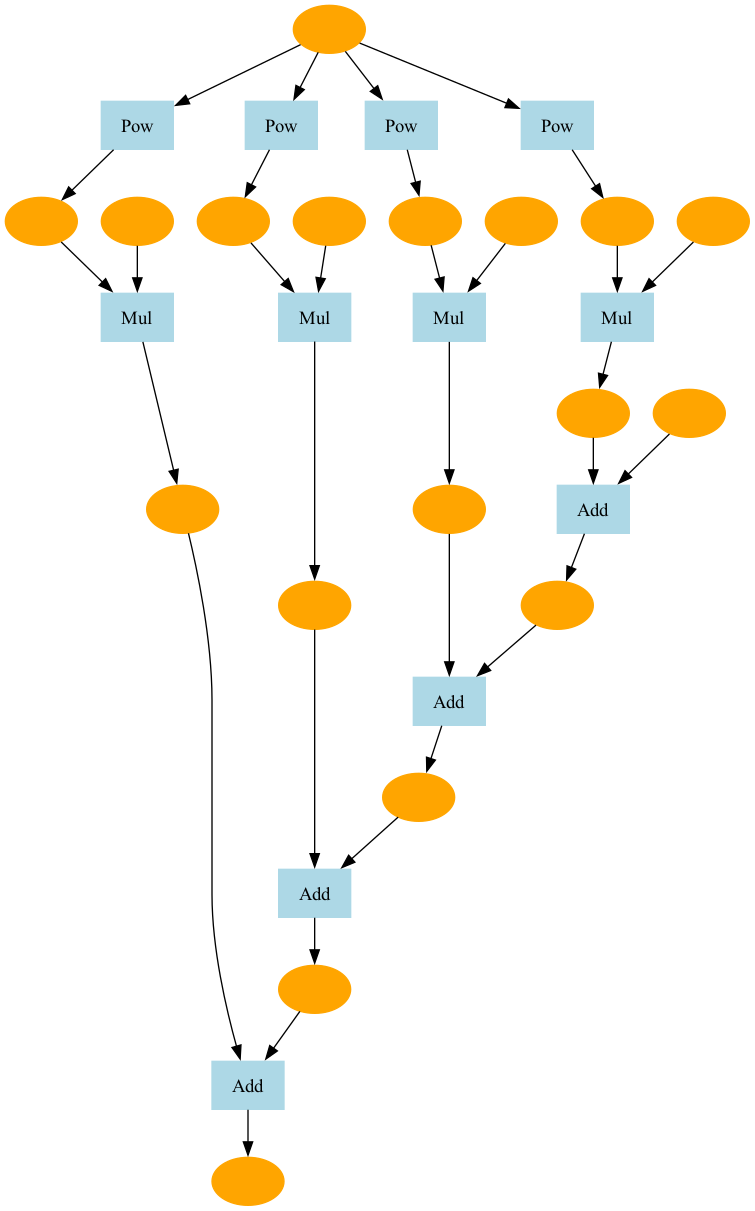

In [23]:
from dezero.utils import plot_dot_graph

plot_dot_graph(y, verbose=False, to_file='sin.png')